SciPy — библиотека для научных и инженерных расчётов.  

Statsmodels — библиотека для статистических исследований.

In [2]:
! pip install statsmodels


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
! pip install scipy


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **АЛГОРИТМ ПРОВЕРКИ СТАТИСТИЧЕСКИХ ГИПОТЕЗ**

Общий алгоритм проверки гипотезы состоит из шести этапов:

1) Построение нулевой и альтернативной гипотез.
2) Выбор уровня значимости .
3) Сбор данных для проверки гипотезы.
4) Выбор статистического теста.
5) Проведение статистического теста, вычисление p-value.
6) Сравнение p-value c уровнем значимости  и вывод, отклонить или не отклонить нулевую гипотезу.

# ***КОЛИЧЕСТВЕННЫЕ (ЧИСЛОВЫЕ) ПРИЗНАКИ***

# **Проверка на нормальность**

## ГРАФИЧЕСКИЕ МЕТОДЫ ПРОВЕРКИ НА НОРМАЛЬНОСТЬ

### 1) Гистограмма

Если гистограмма имеет вид колокола, то мы считаем, что данные в выборке распределены нормально

Рассмотрим гистограмму распределения на примере датасета California Housing, входящего в состав sklearn. Построим гистограмму распределения целевого признака — стоимости домов:

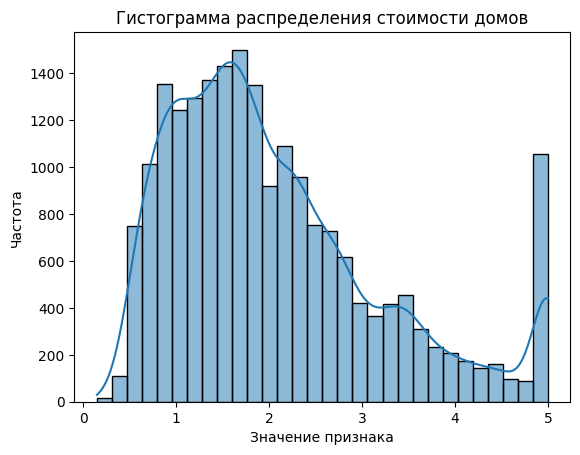

In [3]:
# импортируем библиотеки
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns

# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры гистограммы
ax = sns.histplot(data, bins=30, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Гистограмма распределения стоимости домов')

# отображаем гистограмму
plt.show()

### 2) Квантиль-квантиль график

Квантиль-квантиль график (Q-Q Plot) визуализирует, насколько распределение выборки близко к нормальному. График показывает взаимное расположение квантилей наблюдаемого и теоретического нормального распределения. Хороший гайд по Q-Q Plots.

Если все точки лежат вдоль диагонали, то мы считаем, что данные в выборке распределены нормально:

В Python квантиль-квантиль график можно построить с помощью функции qqplot() пакета statsmodels. Построение квантиль-квантиль графика мы также рассмотрим на примере стоимости домов из датасета California Housing:

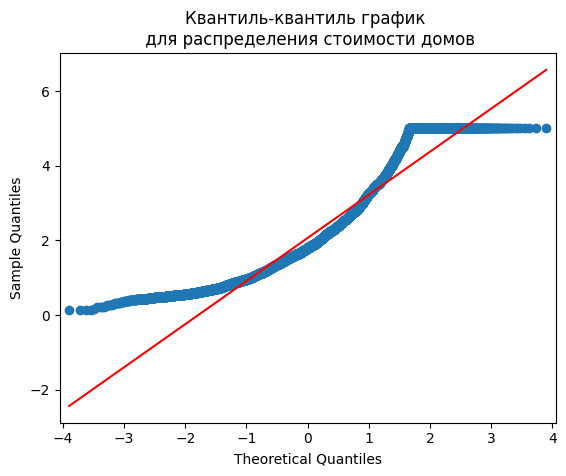

In [4]:
import numpy as np
import statsmodels.api as sm
from sklearn import datasets
from matplotlib import pyplot as plt

# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры квантиль-квантиль графика
sm.qqplot(data, line='s')
plt.title('Квантиль-квантиль график \n для распределения стоимости домов')

# отображаем квантиль-квантиль график
plt.show()

## СТАТИСТИЧЕСКИЕ МЕТОДЫ ПРОВЕРКИ НА НОРМАЛЬНОСТЬ

### Тест Шапиро — Уилка
Тест Шапиро — Уилка оценивает выборку данных и определяет, насколько вероятно, что данные были получены из нормального распределения.

Тест хорошо работает на выборках до 5000 объектов.

Гипотезы в основе теста:

Нулевая: данные распределены нормально.
Альтернативная: данные не распределены нормально.

Если p-value теста больше уровня значимости , то мы считаем, что данные распределены нормально.

### ПРИМЕР ИСПОЛЬЗОВАНИЯ ТЕСТА НА PYTHON

В Python тест Шапиро — Уилка реализован в функции shapiro() пакета scipy. Эта функция принимает на вход выборочные данные, а выдаёт p-значение и дополнительный параметр — статистику теста.

Примечание. Статистика теста не будет нас интересовать, так как её интерпретация, в отличие от p-value, зависит от конкретного типа теста. Поэтому для проведения статистических тестов здесь и далее мы будем ориентироваться только на значение p-value.

Рассмотрим пример использования этой функции.

Допустим, нам необходимо проверить, нормально ли распределение количества заказов в день в некотором интернет-магазине. Чтобы правильно выбрать тест, количество заказов нужно проверить на нормальность:

In [5]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [31, 38, 30, 58, 40, 36, 38, 44, 43, 39, 36, 41, 37, 20, 38, 35, 38, 11, 42, 34]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

# p-value = 0.015
# Распределение не нормальное

p-value = 0.015
Распределение не нормальное


Задание 6.2

Было измерено время, которое необходимо, чтобы оформить заказ в онлайн-магазине. В результате получены следующие значения:

12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10
1. С помощью теста Шапиро — Уилка определите, распределены ли значения нормально. Введите полученное p-значение, округлённое до двух знаков после точки-разделителя.

In [ ]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.2f' % (p))

# p > alpha значит данные распределены нормально

p-value = 0.41


0.41

# **Параметрические тесты**

Все функции, которые реализуют параметрические тесты в библиотеках Python:

* на вход принимают:
- выборки или их параметры;
- параметры проверяемой гипотезы;
* на выход отдают:
- уровень значимости p (p-value);
- дополнительные параметры (в большинстве случаев они нам не нужны).
  
Предполагается, что в примерах из этого юнита все данные распределены нормально. Мы не будем проверять нормальность распределения до проведения теста в целях экономии времени и количества кода. Однако в реальных задачах, чтобы сделать выбор теста, требуется сделать проверку на нормальность.

## ОДНОВЫБОРОЧНЫЙ T-КРИТЕРИЙ

Одновыборочный t-критерий (t-test) используют, чтобы сравнить среднее значение признака с его заданным значением.

Одновыборочный t-критерий реализован в функции ttest_1samp() в модуле stats библиотеки scipy.

**Основные входные параметры:**

a — выборочные данные;  
popmean — ожидаемое среднее значение признака;  
alternative — вид альтернативной гипотезы:
‘two-sided’ (двусторонняя, используется по умолчанию);
‘less’ (левосторонняя);
‘greater’ (правосторонняя).

**Примеры задач, когда может понадобиться использование теста:**

Необходимо проверить, что среднее время, которое пользователи проводят на сайте, больше 5 минут.
Необходимо установить, соответствуют ли химические показатели товара заявленным на упаковке.

### ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

Бизнес-задача

Компания закупает батареи для своих устройств у определённого производителя. Раньше батареи работали 40 часов. Производитель утверждает, что батареи были улучшены и теперь работают дольше.

Компания хочет проверить, правда ли, что батареи работают больше 40 часов. Для этого случайным образом выбрали 20 батарей, замерили время их работы и получили следующие данные в часах: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.

Уровень значимости необходимо взять равным 0.05.

Решение

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: среднее время работы батареи () меньше или равно 40 часам.


Альтернативная гипотеза: среднее время работы батареи () больше чем 40 часов.


Решение на Python:

In [12]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34]

# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.103
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.103
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что время работы батарей стало больше, чем 40 часов.

## ДВУХВЫБОРОЧНЫЙ T-КРИТЕРИЙ

Двухвыборочный t-критерий (t-test) используют, чтобы сравнить средние значения в двух независимых группах.

Двухвыборочный t-критерий реализован в функции ttest_ind() в модуле stats библиотеки scipy.

**Основные входные параметры:**

a, b — выборочные данные двух групп;  
alternative — вид альтернативной гипотезы:  
‘two-sided’ (двусторонняя, используется по умолчанию);  
‘less’ (левосторонняя);  
‘greater’ (правосторонняя);   
equal_var — равны ли дисперсии в группах (по умолчанию равны).  

**Ограничения применения теста:****

* Группы должны быть независимыми.

* Перед использованием необходимо установить равенство (или неравенство) дисперсий в выборках. От этого зависит значение параметра equal_var.

Проверить равенство дисперсии в группах можно с помощью тестов Левена или Бартлетта, которые реализованы в функциях levene() и bartlett() модуля stats библиотеки scipy:

**Нулевая гипотеза обоих тестов утверждает, что дисперсии групп равны.**
На вход функции получают выборочные данные.
На выход функции отдают p-значение.


* Тест можно применять, только если данные в обеих выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

**Примеры задач, когда может понадобиться использование теста (при соблюдении всех его ограничений):**

* Перед испытанием нового фитнес-тренажёра проверяют, что рост и вес в двух группах людей одинаков.  
* Есть две выборки студентов из двух университетов.  Необходимо узнать, есть ли статистически значимая разница в среднем количестве часов в неделю, которые студенты этих университетов тратят на учёбу.

### ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

Бизнес-задача

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Для этого случайным образом выбрали по 20 батарей «Заряд» и «Планета», замерили время их работы и получили следующие данные в часах:

Батареи «Заряд»: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.

Батареи «Планета»: 40, 39, 42, 46, 41, 46, 42, 45, 44, 42, 38, 42, 38, 46, 39, 46, 40, 41, 43, 36.

Уровень значимости необходимо взять равным 0.05.

Решение

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: среднее время работы батарей «Планета» () меньше или равно среднему времени работы батарей «Заряд» ().


Альтернативная гипотеза: среднее время работы батарей «Планета» () больше среднего времени работы батарей «Заряд» ().




In [13]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41,38,40,46,40,46,41,44,43,39,36,41,37,45,38,45,38,48,42,34])
data_planeta = np.array([40,39,42,46,41,46,42,45,44,42,38,42,38,46,39,46,40,41,43,36])

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_planeta, data_zaryad)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_planeta, data_zaryad, alternative='greater', equal_var=True)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Тест на равенство дисперсий
p-value = 0.340
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.260
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что батареи «Планета» работают дольше, чем батареи «Заряд».

Обратите внимание, что порядок выборок в параметрах stats.ttest_ind важен: он должен соответствовать альтернативной гипотезе.

Если бы в нашем примере мы перевернули альтернативную гипотезу,

Альтернативная гипотеза: среднее время работы батарей «Заряд» () меньше среднего времени работы батарей «Планета» ():


, то параметры теста были бы такими (изменён порядок выборок и указано, что альтернативная гипотеза — 'less'):


_, p = stats.ttest_ind(data_zaryad, data_planeta, alternative='less', equal_var=True)
При этом значение p-value не изменяется. Вывод получается таким же.

## ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA)

Однофакторный дисперсионный анализ (ANOVA) используют, чтобы сравнить средние значения в более чем двух независимых группах.

Тест ANOVA реализован в функции f_oneway() в модуле stats библиотеки scipy.

**Основные входные параметры:**

sample1, sample2, … — выборочные данные групп.   

**Ограничения применения теста:**

* Группы должны быть независимыми.

* Тест можно выполнять на группах с равной дисперсией.

Проверку равенства дисперсий также можно выполнить с помощью тестов Левена или Бартлетта. Если дисперсии не равны, необходимо обратиться к непараметрическим тестам.

* Тест можно применять, только если данные в выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

**Примеры задач, когда может понадобиться использование теста (при соблюдении всех его ограничений):**

* Проводится эксперимент, в котором изучают влияние различных видов удобрений на урожайность растений. В эксперименте участвуют несколько выборок растений, к которым применяют разные виды удобрений (более двух).
* Проводится исследование, в котором изучают влияние различных диет на уровень холестерина у людей. В исследовании участвуют три группы людей, каждая из которых придерживается определённой диеты. 

### ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

Бизнес-задача

Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

Уровень значимости необходимо взять равным 0.05.

Случайным образом выбрали по 20 батарей «Заряд», «Планета» и «Энергия», замерили время их работы и получили следующие данные в часах:

Батареи «Заряд»: 31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34.
Батареи «Планета»: 36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43.
Батареи «Энергия»: 35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43.
Решение

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: среднее время работы батарей «Заряд» (), «Планета» () и «Энергия» () одинаковое.


Альтернативная гипотеза: среднее время работы батарей «Заряд» (), «Планета» () и «Энергия» () не одинаковое.

Решение на Python:

In [ ]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05

# загружаем данные
group_zaryad = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
group_planeta = [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43]
group_energiya = [35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(group_zaryad, group_planeta, group_energiya)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Тест на равенство дисперсий
p-value = 0.303
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.141
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что у батарей трёх производителей есть разница во времени работы.

## ПАРНЫЙ T-КРИТЕРИЙ

Парный t-критерий (t-test) используют, чтобы сравнить средние значения в двух зависимых группах.

Парный t-критерий реализован в функции ttest_rel() в модуле stats библиотеки scipy.

**Основные входные параметры:**

a, b — выборочные данные двух зависимых групп;  
alternative — вид альтернативной гипотезы:  
‘two-sided’ (двусторонняя, используется по умолчанию);  
‘less’ (левосторонняя);  
‘greater’ (правосторонняя).

**Ограничения применения теста:**

* Тест можно применять, только если данные в обеих выборках распределены нормально.
Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

**Примеры задач, когда может понадобиться использование теста:**

* Требуется оценить эффективность нового лекарства, сравнивая показатели здоровья (пульса / давления / уровня сахара в крови) одних и тех же пациентов до и после его применения.
* Требуется оценить эффективность рекламной кампании, сравнивая показатели продаж до и после её запуска.

### ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

Бизнес-задача

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Уровень значимости необходимо взять равным 0.05.

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер, то есть результаты эксперимента оказались зависимыми.

Случайным образом выбрали по 10 батарей «Заряд» и «Планета». На каждом из устройств сначала замерили время работы батареи одного производителя, затем — второго и получили следующие данные в часах:

Батареи «Заряд»: 41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46.
Батареи «Планета»: 45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42.
Решение

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: среднее время работы батарей «Планета» () меньше или равно среднему времени работы батарей «Заряд» ().


Альтернативная гипотеза: среднее время работы батарей «Планета» () больше среднего времени работы батарей «Заряд» ().


Решение на Python:

In [16]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46])
data_planeta = np.array([45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42])

# проводим тест
_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative='greater')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: батареи «Планета» работают дольше, чем батареи «Заряд».

## ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA) С ПОВТОРНЫМИ ИЗМЕРЕНИЯМИ

Однофакторный дисперсионный анализ (ANOVA) с повторными измерениями используют, чтобы сравнить средние значения в более чем двух зависимых группах.

Тест ANOVA с повторными измерениями реализован в функции AnovaRM() в модуле stats библиотеки statsmodels.

**Основные входные параметры:**

data — датафрейм с выборочными данными (три колонками: id группы, id объекта, значение признака);  
within — название колонки с id группы;  
subject — название колонки с id объекта;  
depvar — название колонки со значением признака.  

**Ограничения применения теста:**

* Тест можно применять, только если данные в обеих выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

**Примеры задач, когда может понадобиться использование теста:**

Требуется оценить эффективность нового лекарства, сравнивания показатели здоровья одних и тех же пациентов до его приёма и через каждую неделю после начала приёма (количество периодов — более двух).
Требуется изучать влияние нового рекламного материала на покупательское поведение клиентов ежедневно на протяжении недели.

### ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

Бизнес-задача

Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

Уровень значимости необходимо взять равным 0.05.

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер.

Случайным образом выбрали по пять батарей «Заряд», «Планета» и «Энергия». На одном устройстве замерили время работы батареи одного производителя, затем — второго, затем — третьего и получили следующие данные в часах:

Батареи «Заряд»: 36, 45, 41, 41, 35.
Батареи «Планета»: 32, 34, 42, 48, 43.
Батареи «Энергия»: 41, 39, 35, 34, 52.
Решение

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: среднее время работы батарей «Заряд» (), «Планета» () и «Энергия» () одинаковое.


Альтернативная гипотеза: среднее время работы батарей «Заряд» (), «Планета» () и «Энергия» () не одинаковое.


Решение на Python:

In [24]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# задаём уровень значимости
alpha = 0.05 

# создаём датасет
data = pd.DataFrame({'group': np.repeat(['Заряд', 'Планета', 'Энергия'], 5),
                          'object_id': np.tile([1, 2, 3, 4, 5], 3),                          
                          'value': [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52]})


# проводим тест
print(AnovaRM(data=data, depvar='value', subject='object_id', within=['group']).fit())


              Anova
      F Value Num DF Den DF Pr > F
----------------------------------
group  0.0100 2.0000 8.0000 0.9900



Обратите внимание, что для использования теста необходимо вызвать метод fit(). Формат информации, который возвращает функция AnovaRM(), сильно отличается от ранее рассмотренных тестов: p-value отображается в колонке Pr > F.

В нашем примере p-значение равно 0.99. P-значение больше, чем заданный уровень значимости 0.05. Таким образом, у нас нет оснований отвергнуть нулевую гипотезу.

Вывод: у нас нет оснований утверждать, что у батарей трёх производителей есть разница во времени работы.

# **Непараметрические тесты**

Такие тесты используются, когда данные не распределены нормально или об их распределении ничего не известно.

Особенность непараметрических методов в том, что они сравнивают не сами значения признаков, а их ранги или частоты.

В параметрических методах нулевые гипотезы содержали утверждения о равенстве средних значений признаков в группах. В непараметрических тестах нулевые гипотезы будут о равенстве распределений признаков (что включает в себя равенство средних) или о равенстве медиан признаков (в нормальных распределениях медианы и средние равны).  

Все функции, которые реализуют непараметрические тесты в Python-библиотеках:

берут на вход:  
выборки или их параметры;  
параметры проверяемой гипотезы;  
отдают на выход:  
уровень значимости p (p-value);  
дополнительные параметры.  

В примерах этого юнита мы не проверяем данные на нормальность. Однако чтобы выбрать тест в реальных задачах, необходимо сделать такую проверку. Если данные распределены нормально, лучше выбрать параметрические тесты.

**Гипотезы для одновыборочных тестов**

Как сформулировать нулевую и альтернативную гипотезы для теста, если у нас всего одна выборка?

В этом случае имеющаяся выборка (точнее, её статистика, вычисляемая тестом) будет сравниваться со значением, заданным в параметрах теста:

Нулевая гипотеза — соответствие (равенство) выборки и заданного значения.
Альтернативная гипотеза — их отличие.

### КРИТЕРИЙ ЗНАКОВ (ДЛЯ ОДНОЙ ГРУППЫ)

Критерий знаков (для одной группы) используют, чтобы сравнить значения медианы признака с заданным значением. Это непараметрический аналог одновыборочного t-критерия.

Критерий знаков (для одной группы) реализован в функции sign_test модуля stats библиотеки statsmodels.

* Основные входные параметры:

samp — выборочные данные;  
mu0 — ожидаемое значение медианы признака.  

* Пример задачи, когда может понадобиться использование теста:

Требуется проверить, соответствует ли время ответа оператора времени, заявленному в программе лояльности (время ответа, как правило, не подчиняется нормальному закону).  

#### ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

Бизнес-задача

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. Планировалось, что это приведёт к изменению времени, за которое покупатель получает ответ на вопрос (раньше оно составляло 60 секунд). Бизнес-заказчик просит узнать, действительно ли время получения ответа больше не составляет 60 секунд.

Чтобы это проверить, замерили время ответа чат-бота для 30 случайно выбранных вопросов. В результате получили следующие данные (в секундах):

55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59

Уровень значимости необходимо взять равным 0.05.

Решение

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: значение медианы получения ответа с помощью чат-бота () равно 60 секунд.

Альтернативная гипотеза: значение медианы получения ответа с помощью чат-бота () не равно 60 секунд.


Решение на Python:

In [1]:
from statsmodels.stats.descriptivestats import sign_test

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]

# проводим тест
_, p = sign_test(data, 60)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод:** время получения ответа изменилось и больше не составляет 60 секунд.

### U-КРИТЕРИЙ МАННА — УИТНИ

U-критерий Манна — Уитни используют, чтобы оценить различия распределений признака в двух независимых группах. Это непараметрический аналог двухвыборочного t-критерия.

U-критерий Манна — Уитни реализован в функции mannwhitneyu модуля stats библиотеки scipy.

**Основные входные параметры:**

x, y — выборочные данные двух групп;  
alternative — вид альтернативной гипотезы:  
‘two-sided’ (двусторонняя, используется по умолчанию);
‘less’ (левосторонняя);
‘greater’ (правосторонняя).  

Метод основан на следующей процедуре:

Две выборки объединяют и упорядочивают в порядке возрастания признака.  
Определяют, равномерно ли распределены объекты каждой группы в упорядоченном списке.  
Если объекты одной из групп сконцентрированы в одной из частей списка, то распределения признаков неодинаковы.

**Примеры задач, когда может понадобиться использование теста:**

* Требуется сравнить распределение зарплат выпускников университета А с зарплатой пяти выпускников университета Б (распределение зарплаты, как правило, не является нормальным).
* Необходимо узнать, различаются ли распределения потери веса для двух групп: для людей, использующих диету А, и для людей, использующих диету Б (потеря веса, как правило, не распределяется нормально).
ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

Бизнес-задача

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. До этого покупатели могли получить ответ на вопрос через звонок оператору. Бизнес-заказчик просит проверить, изменилось ли время получения ответа после внедрения чат-бота.

Чтобы это выяснить, замерили время ответа с помощью чат-бота для 30 случайно выбранных вопросов, а также время ответа через звонок оператору для ещё 30 случайно выбранных вопросов . В результате получили следующие данные (в секундах):

Чат-бот: 55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59.
Звонок оператору: 72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63.
Уровень значимости необходимо взять равным 0.05.

Решение

Сформулируем гипотезы:

Нулевая гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору одинаковы.  
Альтернативная гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору неодинаковы.

Решение на Python:

In [2]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_chat_bot = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]
data_operator = [72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63]

# проводим тест
_, p = stats.mannwhitneyu(data_chat_bot, data_operator)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод:** время получения ответа изменилось после внедрения чат-бота.

## КРИТЕРИЙ УИЛКОКСОНА

Критерий Уилкоксона используют, чтобы оценить различия распределений признака в двух зависимых группах. Это непараметрический аналог парного t-критерия.

Критерий Уилкоксона реализован в функции wilcoxon модуля stats библиотеки scipy.

**Основные входные параметры:**

x, y — выборочные данные двух групп;  
alternative — вид альтернативной гипотезы:
‘two-sided’ (двусторонняя, используется по умолчанию);
‘less’ (левосторонняя);
‘greater’ (правосторонняя).

Этот тест аналогичен критерию знаков (для одной группы).

**Примеры задач, когда может понадобиться использование теста:**

* Необходимо сравнить два метода обучения, сравнив успеваемость студентов до и после использования каждого из методов (успеваемость не распределена нормально).
* Требуется оценить различия в затратах на производство продукта до и после обновления технологий (затраты не подчиняются нормальному закону).

ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

Бизнес-задача

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. До этого покупатели могли получить ответ на вопрос через звонок оператору. Планировалось, что нововведение приведёт к уменьшению времени получения ответа. Бизнес-заказчик просит узнать, действительно ли получить ответ с помощью чат-бота быстрее, чем через звонок оператору. Эксперты в предметной области говорят, что время ответа сильно зависит от вопроса покупателя, поэтому замер необходимо делать на одних и тех же вопросах.

Чтобы решить задачу, для 30 случайно выбранных вопросов сначала замерили время ответа с помощью чат-бота, а затем — время ответа через звонок оператору. В результате получили следующие данные (в секундах):

Чат-бот: 71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73.
Звонок оператору: 114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106.
Уровень значимости необходимо взять равным 0.05.

Решение

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору одинаковы.  
Альтернативная гипотеза: распределение времени получения ответа через чат-бота меньше, чем распределение времени через звонок оператору.

Решение на Python:

In [3]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_chat_bot = [71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73]
data_operator = [114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106]

# проводим тест
_, p = stats.wilcoxon(data_chat_bot, data_operator, alternative = 'less')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод:** время получения ответа через чат-бота меньше, чем через звонок оператору.

### КРИТЕРИЙ КРАСКЕЛА — УОЛЛИСА

Критерий Краскела — Уоллиса (однофакторный дисперсионный анализ на рангах) является обобщением U-критерия Манна — Уитни на случай нескольких групп. Его используют, чтобы оценить различия медиан признака в двух и более независимых группах. Это непараметрический аналог ANOVA.

Критерий Краскела — Уоллиса реализован в функции kruskal модуля stats библиотеки scipy.

**Основные входные параметры:**

sample1, sample2, … — выборочные данные групп.

**Примеры задач, когда может понадобиться использование теста:**

* Необходимо сравнить распределения стоимости заказов в нескольких городах. Чтобы избежать влияния выбросов, вместо сравнения средних значений используют ранги.
* Требуется сравнить распределения стоимости жилья в разных районах города. Чтобы учесть различия в распределении стоимости, вместо сравнения средних значений используют ранги.

ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

Бизнес-задача

У онлайн-магазина существуют три независимых уровня программы лояльности: «Базовый», «Серебряный» и «Золотой». Вопросы покупателей, на которые не может ответить чат-бот, направляются оператору. Чтобы вопросы от покупателей более высокого уровня лояльности обрабатывались быстрее, разработали систему ранжирования вопросов. Бизнес-заказчик просит проверить, действительно ли есть разница во времени обработки вопроса для покупателей разных уровней лояльности.

Чтобы это выяснить, случайным образом выбрали по 30 вопросов для каждого уровня и замерили для них время ответа с помощью чат-бота. В результате получили следующие данные (в секундах):

Базовый: 106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98.
Серебряный: 96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116.
Золотой: 99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111.
Уровень значимости необходимо взять равным 0.05.

Решение

Сформулируем гипотезы в математическом виде:

Нулевая гипотеза: медианы времени обработки вопросов от покупателей уровней базовый (), серебряный () и золотой () равны.
Альтернативная гипотеза: медианы времени обработки вопросов от покупателей уровней базовый (), серебряный () и золотой () не равны.

Решение на Python:

In [4]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98 ]
data_silver = [96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116]
data_gold = [99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111]

# проводим тест
_, p = stats.kruskal(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.837
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:** у нас нет оснований утверждать, что есть разница во времени обработки вопросов от покупателей разных уровней лояльности.

### КРИТЕРИЙ ФРИДМАНА

Критерий Фридмана используют, чтобы оценить различия распределений признака в двух и более зависимых группах. Это непараметрический аналог парного ANOVA с повторными измерениями.

Критерий Фридмана реализован в функции friedmanchisquare модуля stats библиотеки scipy.

**Основные входные параметры:**

sample1, sample2, … — выборочные данные групп.

ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

Бизнес-задача

У онлайн-магазина существуют три связанных между собой уровня программы лояльности: «Базовый», «Серебряный» и «Золотой». Вопросы покупателей, на которые не может ответить чат-бот, направляются оператору. Чтобы вопросы от покупателей более высокого уровня лояльности обрабатывались быстрее, разработали систему ранжирования вопросов. Бизнес-заказчик просит проверить, действительно ли есть разница во времени обработки вопроса для покупателей разных уровней лояльности. Эксперты в предметной области говорят, что время ответа сильно зависит от вопроса покупателя, поэтому замер стоит делать на одних и тех же вопросах.

Чтобы решить задачу, случайным образом выбрали 30 вопросов и замерили на них время ответа с помощью чат-бота для трёх уровней лояльности. В результате получили следующие данные (в секундах):

«Базовый»: 113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103.
«Серебряный»: 89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82.
«Золотой»: 62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65.
Уровень значимости необходимо взять равным 0.05.

Решение

Сформулируем гипотезы:

Нулевая гипотеза: распределения времени обработки вопросов от покупателей уровней «Базовый», «Серебряный» и «Золотой» одинаковы.  
Альтернативная гипотеза: распределения времени обработки вопросов от покупателей уровней «Базовый», «Серебряный» и «Золотой» неодинаковы.

Решение на Python:

In [5]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103]
data_silver = [89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82]
data_gold = [62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65]

# проводим тест
_, p = stats.friedmanchisquare(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод:** время обработки вопросов для покупателей разных уровней лояльности различно.

# ***КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ***

Основное отличие категориальных признаков от количественных состоит в том, что над категориальными значениями нельзя выполнять арифметические операции: вычислять среднее, медиану, дисперсию и т. д.

Для категориальных признаков можно только посчитать количество объектов в выборке с каждым из значений категориального признака, то есть посчитать частоты. Например, в выборке клиентов сотового оператора есть 50 человек с тарифом «Ультима», 30 человек — с тарифом «Мега» и 60 человек — с тарифом «Абсолют».

Все статистические тесты для категориальных признаков основаны именно на подсчёте и сравнении частот.

Тестов для категориальных признаков много: они отличаются по количеству сравниваемых групп, по зависимости в группах, по ограничениям на анализируемые данные. Мы рассмотрим два наиболее популярных теста, которые позволяют решать большинство задач:

**Критерий хи-квадрат** позволяет оценить, связаны ли между собой два категориальных признака.

Примеры гипотез:

* Есть ли связь между городом и уровнем образования его жителей?
* Есть ли связь между тарифом сотового оператора и сферой работы клиента?

**Критерий Мак-Немара** позволяет определить, есть ли статистически значимые различия в частоте появления бинарных признаков в двух связанных выборках.

Примеры гипотез:

* Отличается ли доля заболевших гриппом до и после прививки?
* Отличаются ли доли товаров, считающихся бракованными, при проверке на новом и старом оборудовании?

Функции для тестов над категориальными переменными отдают на выход уровень значимости p, по которому мы можем принять решение о верности выдвинутых гипотез.

## КРИТЕРИЙ ХИ-КВАДРАТ

Критерий хи-квадрат () используют, чтобы определить связь между двумя категориальными переменными. Это одновыборочный тест: мы анализируем взаимосвязь между двумя признаками объектов одной выборки.

Критерий хи-квадрат реализован в функции chi2_contingency модуля stats библиотеки scipy.

**Основные входные параметры:**

observed — таблица сопряжённости для двух категориальных переменных.    
Таблица сопряжённости — это средство представления совместного распределения двух переменных, в котором:

* строки соответствуют возможным значениям первого признака;
* столбцы соответствуют возможным значениям второго признака;
* значения ячеек — это количество объектов в выборке с соответствующими значениями первого и второго признаков.  

**Условие применимости критерия хи-квадрат** — наличие как минимум пяти объектов в каждой ячейке. Если это условие не выполняется, необходимо обратиться к точному критерию Фишера.

Таблицу сопряжённости можно построить с помощью функции crosstab библиотеки Pandas. На вход функции подаются два списка со значениями первого и второго признаков, для которых необходимо построить таблицу сопряжённости.

### ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

Бизнес-задача

Оператор сотовой связи хочет узнать, есть ли связь между тарифом, который выбрал клиент, и наличием у него детей.

Были собраны необходимые данные по 39 случайным клиентам.

Уровень значимости необходимо взять равным 0.05.

Решение

Сформулируем гипотезы:

Нулевая гипотеза: признаки «Тариф» и «Наличие детей» независимы.  
Альтернативная гипотеза: признаки «Тариф» и «Наличие детей» взаимосвязаны.

Решение на Python:

In [12]:
import scipy.stats as stats
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('data/cat_variables_tarif_children.csv')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['Тариф'], data['Наличие детей'])

# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.373
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


## КРИТЕРИЙ МАК-НЕМАРА

Критерий Мак-Немара — это двухвыборочный тест для связанных выборок, который позволяет сравнить бинарные признаки.

Критерий Мак-Немара реализован в функции mcnemar модуля stats библиотеки statsmodels.

**Основные входные параметры:**

table — таблица сопряжённости размера 2х2. 

### ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

Бизнес-задача

Оператор сотовой связи хочет увеличить долю клиентов, которые пользуются мобильным приложением. Для этого провели соответствующую рекламную кампанию. Необходимо узнать, изменилась ли доля клиентов, пользующихся приложением, после проведения рекламной кампании.

Были собраны данные об использовании приложения по 30 случайным клиентам до и после рекламной кампании.

Уровень значимости необходимо взять равным 0.05.

Решение

Сформулируем гипотезы:

* Нулевая гипотеза: после просмотра рекламы доля клиентов, которые пользуются приложением, не изменилась.
* Альтернативная гипотеза: после просмотра рекламы доля клиентов, которые пользуются приложением, изменилась.

Решение на Python:

In [6]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('data/cat_variables_usage.csv')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['До'], data['После'])

# проводим тест
res = mcnemar(table)

# извлекаем значение p-value из результатов теста
p = res.pvalue

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.013
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод:** после просмотра рекламы доля клиентов, которые пользуются приложением, изменилась.

## Если категориальный признак - порядковый
Среди категориальных признаков выделяют порядковые — это признаки, значения которых можно упорядочить: например, уровень образования, удовлетворённость предоставленными услугами и т. д. К таким признакам можно применять непараметрические тесты для количественных признаков, предварительно преобразовав категориальную шкалу в количественную.

Преобразование можно сделать с помощью функции replace библиотеки pandas. На вход функции необходимо подать список значений, которые нужно заменить, и список значений, на которые нужно заменить первоначальные значения. Пример выполнения преобразования:

In [10]:
# создание датасета
data = pd.DataFrame(["среднее профессиональное", "высшее образование", "основное общее", "среднее общее", "основное общее", "среднее профессиональное"], columns=['Уровень образования']) 
display(data)

# перевод категориального признака в количественный
data['Уровень образования'] = data['Уровень образования'].replace(["основное общее", "среднее общее", "среднее профессиональное", "высшее образование"], [1, 2, 3, 4])
display(data)

,Уровень образования
0,среднее профессиональное
1,высшее образование
2,основное общее
3,среднее общее
4,основное общее
5,среднее профессиональное


C:\Users\Lario\AppData\Local\Temp\ipykernel_15388\2965422971.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Уровень образования'] = data['Уровень образования'].replace(["основное общее", "среднее общее", "среднее профессиональное", "высшее образование"], [1, 2, 3, 4])


,Уровень образования
0,3
1,4
2,1
3,2
4,1
5,3


Выбор теста может казаться непростой задачей, но сейчас необязательно запоминать их все. Главное — понять, что правильный выбор теста зависит:

* от вопроса, на который мы хотим получить ответ;
* от того, связь между данными каких типов мы хотим проверить;
* от того, какие предположения о данных мы делаем.  

Если при решении реальной задачи вы будете сомневаться в том, какой тест выбрать, попробуйте найти в статьях или выступлениях на конференциях, с помощью каких тестов отвечали на вопросы, подобные вашему, в других компаниях.